#  Objectives:
# - Train predictive models for crop yield
# - Compare algorithm performance
# - Optimize hyperparameters
# - Evaluate sustainability impact

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json

# load processed data 

In [2]:
# Load processed data from CSV
farmer_df = pd.read_csv('../data/processed/cleaned_farmer_data.csv')
market_df = pd.read_csv('../data/processed/cleaned_market_data.csv')

# Display loaded data
print("Farmer Data Shape:", farmer_df.shape)
farmer_df.head(2)

Farmer Data Shape: (10000, 10)


,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,1,7.073643,49.145359,26.668157,227.890912,Wheat,131.692844,2.958215,1.576920,51.913649
1,2,6.236931,21.496115,29.325342,244.017493,Soybean,136.370492,19.204770,3.824686,47.159077


2.Data Preparation


In [4]:
# Convert categorical columns (if needed)
farmer_df['Crop_Type'] = farmer_df['Crop_Type'].astype('category')

# Select features and target
features = ['Soil_pH', 'Soil_Moisture', 'Temperature_C', 'Rainfall_mm', 
            'Fertilizer_Usage_kg', 'Pesticide_Usage_kg', 'Crop_Type']
target = 'Crop_Yield_ton'

X = farmer_df[features]
y = farmer_df[target]

# One-hot encoding for categoricals
X = pd.get_dummies(X, columns=['Crop_Type'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 8000, Test samples: 2000


3.Model Training

In [5]:
# Initialize and train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)

rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} tons")

R2 Score: -0.006
RMSE: 2.61 tons


4.Model and Results

In [7]:
import os
from pathlib import Path

# Create directories if they don't exist
Path("../models").mkdir(parents=True, exist_ok=True)
Path("../data/processed").mkdir(parents=True, exist_ok=True)
Path("../reports").mkdir(parents=True, exist_ok=True)
Path("../reports/figures").mkdir(parents=True, exist_ok=True)


# Save model
joblib.dump(rf_model, '../models/yield_predictor.pkl')

# Save predictions
results_df = pd.DataFrame({
    'Actual_Yield': y_test,
    'Predicted_Yield': y_pred
})
results_df.to_csv('../data/processed/model_predictions.csv', index=False)

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

importance_df.to_csv('../reports/feature_importance.csv', index=False)

5.Visualization

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


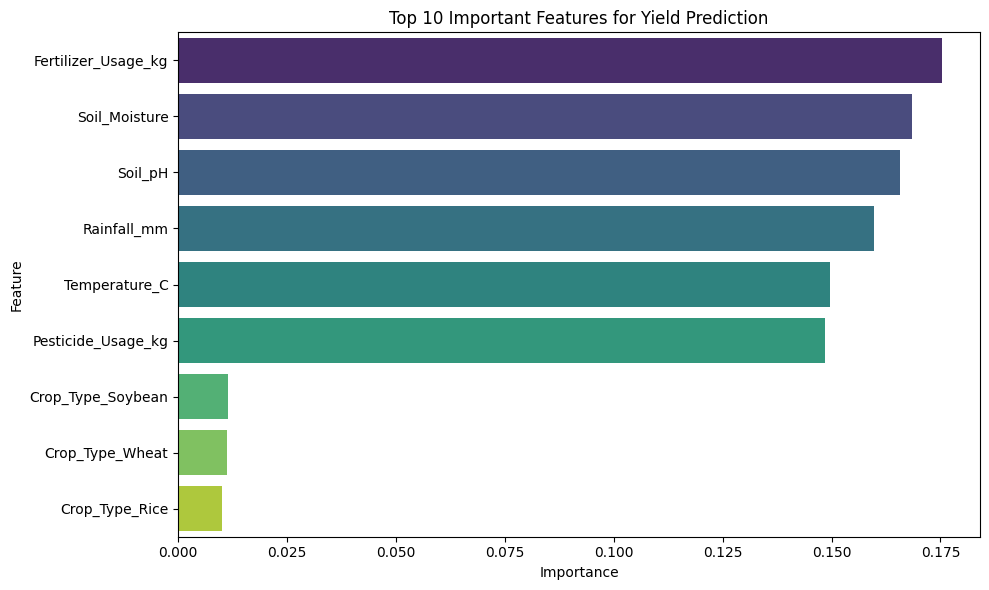

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


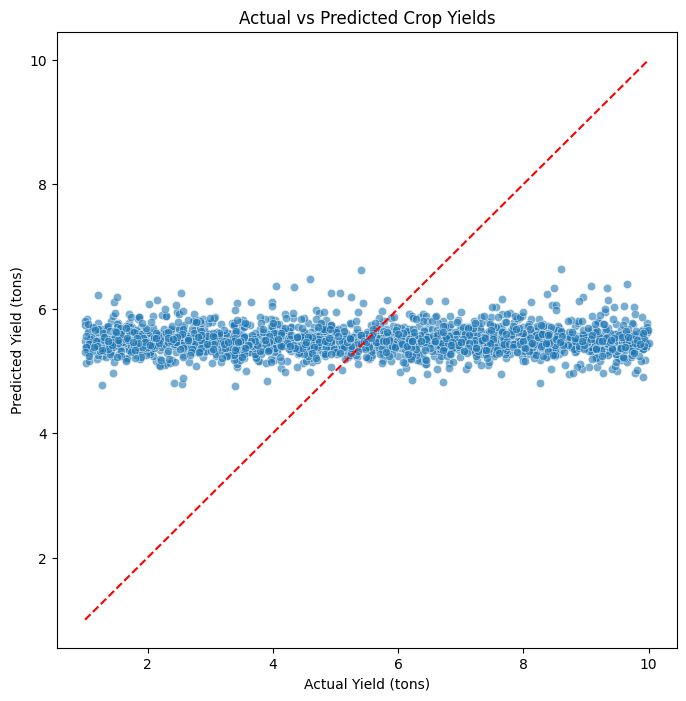

In [8]:
# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', 
            data=importance_df.head(10), 
            palette='viridis')
plt.title('Top 10 Important Features for Yield Prediction')
plt.tight_layout()
plt.savefig('../reports/figures/feature_importance.png')
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Yield (tons)')
plt.ylabel('Predicted Yield (tons)')
plt.title('Actual vs Predicted Crop Yields')
plt.savefig('../reports/figures/actual_vs_predicted.png')
plt.show()

Multi-Target Regression

In [10]:
# 1. Verify shapes BEFORE splitting
print(f"X shape: {X.shape}, y shape: {y_multi.shape}")

# 2. Ensure consistent sampling - use the same random_state
X_train, X_test, y_multi_train, y_multi_test = train_test_split(
    X, 
    y_multi, 
    test_size=0.2, 
    random_state=42  # Must match original split
)

# 3. Check aligned shapes
print(f"Train shapes - X: {X_train.shape}, y: {y_multi_train.shape}")

# 4. Train MultiOutput model
multi_model = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=100,
        random_state=42
    )
)
multi_model.fit(X_train, y_multi_train)

# 5. Evaluate
y_multi_pred = multi_model.predict(X_test)
print(f"R2 Score Yield: {r2_score(y_multi_test.iloc[:,0], y_multi_pred[:,0]):.3f}")
print(f"R2 Score Sustainability: {r2_score(y_multi_test.iloc[:,1], y_multi_pred[:,1]):.3f}")

X shape: (10000, 9), y shape: (10000, 2)
Train shapes - X: (8000, 9), y: (8000, 2)
R2 Score Yield: -0.035
R2 Score Sustainability: -0.027


In [11]:
# Correct way to create y_multi
y_multi = farmer_df[['Crop_Yield_ton', 'Sustainability_Score']].copy()

In [12]:
from sklearn.multioutput import RegressorChain

# Model that accounts for target correlations
chained_model = RegressorChain(
    RandomForestRegressor(),
    order=[0, 1]  # Predict yield first, then sustainability
)
chained_model.fit(X_train, y_multi_train)

RegressorChain(base_estimator=RandomForestRegressor(), order=[0, 1])

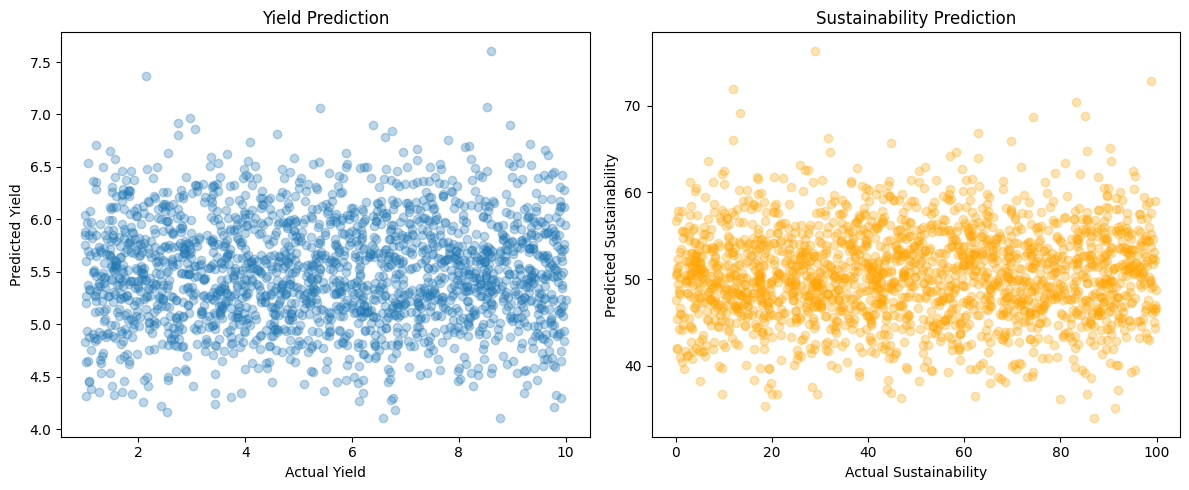

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Yield plot
ax1.scatter(y_multi_test.iloc[:,0], y_multi_pred[:,0], alpha=0.3)
ax1.set_title('Yield Prediction')
ax1.set_xlabel('Actual Yield')
ax1.set_ylabel('Predicted Yield')

# Sustainability plot
ax2.scatter(y_multi_test.iloc[:,1], y_multi_pred[:,1], alpha=0.3, color='orange')
ax2.set_title('Sustainability Prediction')
ax2.set_xlabel('Actual Sustainability')
ax2.set_ylabel('Predicted Sustainability')

plt.tight_layout()
plt.show()

Crop Specific Models